In [14]:
import numpy as np
from plump_rl import (
    EnvConfig,
    DressedCardPolicy,
    ZeroBidDodger,
    ShortSuitAggressor,
    MiddleManager,
    simulate_random_tournaments,
)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:

policy_pool = [DressedCardPolicy, ZeroBidDodger, ShortSuitAggressor, MiddleManager]
config = EnvConfig(num_players=5, hand_size=10)

result = simulate_random_tournaments(
    num_tournaments=1000,
    policy_factories=policy_pool,
    base_config=config,
    seed=42,
)

for name, stats in result.policy_stats.items():
    print(
        f"{name:20s} seats={stats.seats_played:3d} "
        f"avg_points={stats.average_points:5.2f} "
        f"wins={stats.tournament_wins}"
    )

DressedCardPolicy    seats=1266 avg_points=81.99 wins=483
MiddleManager        seats=1264 avg_points=48.10 wins=86
ShortSuitAggressor   seats=1206 avg_points=19.26 wins=6
ZeroBidDodger        seats=1264 avg_points=83.65 wins=456


In [17]:
from plump_rl import EnvConfig, DressedCardPolicy, train_dqn

opponents = [None, DressedCardPolicy(), DressedCardPolicy(), DressedCardPolicy()]
result = train_dqn(num_episodes=500, config=EnvConfig(num_players=4, hand_size=10), opponents=opponents)

[Episode 50] avg_reward (last 50): 1.30
[Episode 100] avg_reward (last 50): 0.54
[Episode 150] avg_reward (last 50): 0.54
[Episode 200] avg_reward (last 50): 1.64
[Episode 250] avg_reward (last 50): 1.12
[Episode 300] avg_reward (last 50): 1.66
[Episode 350] avg_reward (last 50): 2.30
[Episode 400] avg_reward (last 50): 1.36
[Episode 450] avg_reward (last 50): 2.12
[Episode 500] avg_reward (last 50): 1.76


In [18]:
print(result)

TrainingResult(episode_rewards=[14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 17.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [19]:
from matplotlib import pyplot as plt

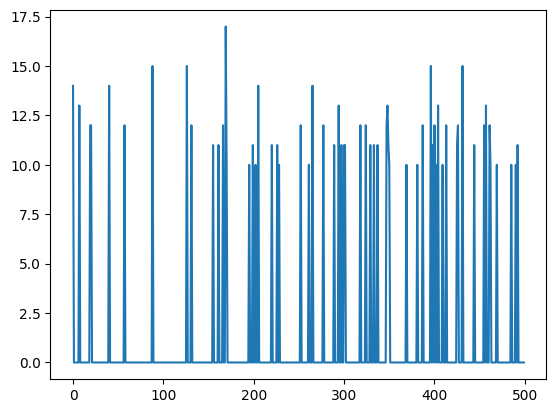

In [21]:
plt.plot(result.episode_rewards)